# All Imports

In [1]:
import pycaret
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from pycaret.datasets import get_data

# Import dataset from Kaggle

In [2]:
df = get_data('bank')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Run the initial setup using the Functional APIs

In [3]:
initial_setup = setup(df, target = 'loan')
best_fit_model = compare_models()
best_fit_model

,Description,Value
0,Session id,1678
1,Target,loan
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Numeric features,7
9,Categorical features,9


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8441,0.7166,0.8441,0.8092,0.7911,0.1111,0.1797,0.9290
gbc,Gradient Boosting Classifier,0.8425,0.7115,0.8425,0.8075,0.7818,0.0680,0.1390,2.1020
rf,Random Forest Classifier,0.8412,0.6860,0.8412,0.7981,0.7882,0.0993,0.1574,2.1450
lr,Logistic Regression,0.8406,0.6808,0.8406,0.8150,0.7701,0.0151,0.0681,3.0250
lda,Linear Discriminant Analysis,0.8404,0.6806,0.8404,0.7964,0.7733,0.0299,0.0849,0.3160
ridge,Ridge Classifier,0.8399,0.6806,0.8399,0.8187,0.7680,0.0059,0.0410,0.4200
dummy,Dummy Classifier,0.8398,0.5000,0.8398,0.7052,0.7666,0.0000,0.0000,0.2460
ada,Ada Boost Classifier,0.8390,0.6969,0.8390,0.7842,0.7771,0.0477,0.0970,0.8380
et,Extra Trees Classifier,0.8286,0.6537,0.8286,0.7752,0.7870,0.1074,0.1330,1.8230
knn,K Neighbors Classifier,0.8185,0.5485,0.8185,0.7482,0.7715,0.0392,0.0502,2.1090


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1678, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

# Analyse

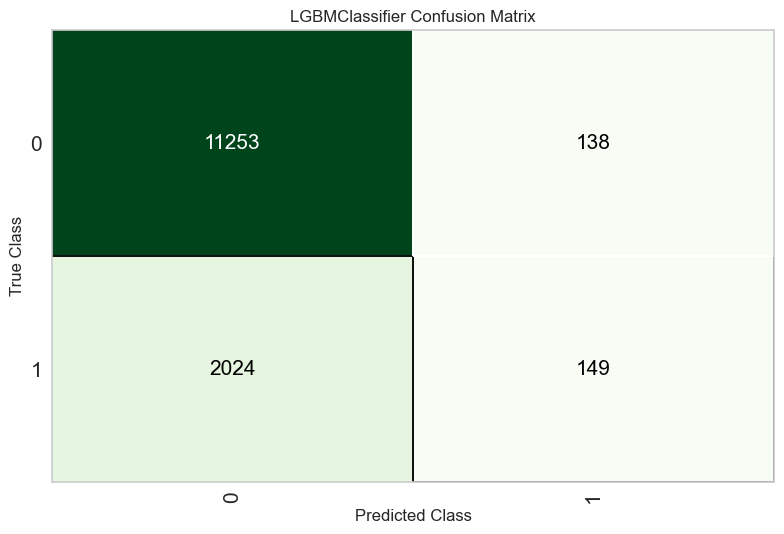

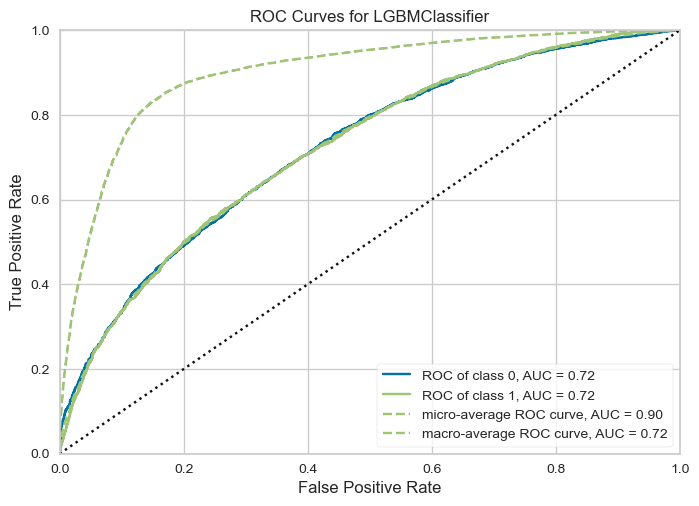

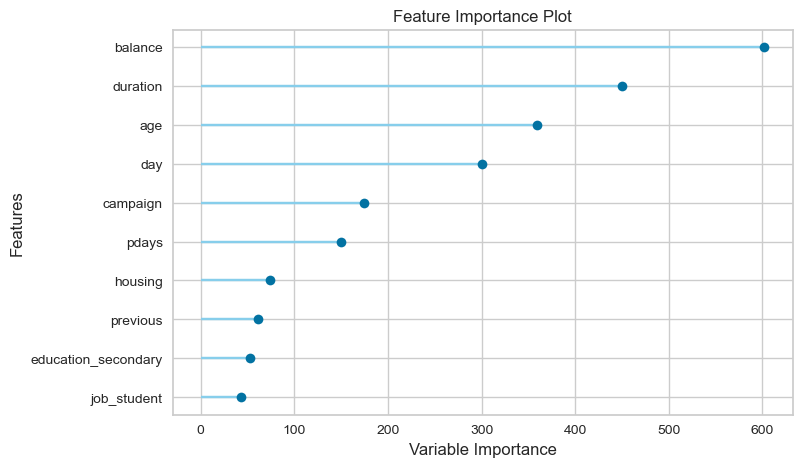

In [4]:
plot_model(best_fit_model, plot = 'confusion_matrix')
plot_model(best_fit_model, plot = 'auc')
plot_model(best_fit_model, plot = 'feature')

# Evaluate the best model and use it for prediction

In [5]:
evaluate_model(best_fit_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
holdout_pred = predict_model(best_fit_model)
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8406,0.7228,0.8406,0.7949,0.7856,0.0870,0.1439


,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,loan,prediction_label,prediction_score
11027,38,services,single,unknown,no,1610,yes,unknown,17,jun,76,6,-1,0,unknown,no,no,no,0.9818
23112,45,management,married,tertiary,no,22815,no,cellular,26,aug,653,8,-1,0,unknown,no,no,no,0.9804
39640,28,technician,single,secondary,no,6551,no,cellular,26,may,362,1,77,1,failure,no,no,no,0.9143
21739,57,retired,married,secondary,no,81,no,cellular,19,aug,118,3,-1,0,unknown,no,no,no,0.8258
20515,33,technician,single,secondary,yes,329,no,cellular,12,aug,137,2,-1,0,unknown,no,no,no,0.7439


In [7]:
predictions = predict_model(best_fit_model, data = df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8500,0.7953,0.8500,0.8320,0.7996,0.1477,0.2356


,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,loan,prediction_label,prediction_score
0,58,management,married,tertiary,no,2143,yes,unknown,5,may,261,1,-1,0,unknown,no,no,no,0.8315
1,44,technician,single,secondary,no,29,yes,unknown,5,may,151,1,-1,0,unknown,no,no,no,0.8333
2,33,entrepreneur,married,secondary,no,2,yes,unknown,5,may,76,1,-1,0,unknown,no,yes,no,0.7230
3,47,blue-collar,married,unknown,no,1506,yes,unknown,5,may,92,1,-1,0,unknown,no,no,no,0.9233
4,33,unknown,single,unknown,no,1,no,unknown,5,may,198,1,-1,0,unknown,no,no,no,0.9774


# Save the model

In [8]:
save_model(best_fit_model, 'Classification_MBA_admit')
loaded_classification_pipeline = load_model('Classification_MBA_admit')
loaded_classification_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Dell\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indicat...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=1678, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)